In [2]:
import cv2
import glob
import numpy as np
import pickle
import os

# 棋盘规格
BOARD_RAW = 20
BOARD_COL = 20

# 图片保存路径
IMG_SAVE_PATH = "img/"
IMG_RESULT_PATH = "result/"

if __name__ == '__main__':
    obj_p = np.zeros((BOARD_RAW*BOARD_COL, 3), np.float32)

    # np.mgrid[0:raw, 0:col]的shape为(2, 19, 13)转置后为(13, 19, 2)，reshape后为(13*19, 2)
    # obj_p[:, :2]===>obj_p[:, 0] and obj_p[:, 1]
    obj_p[:, :2] = np.mgrid[0:BOARD_RAW, 0:BOARD_COL].T.reshape(-1, 2)
    # print('obj_p:', obj_p)

    obj_points = []
    img_points = []

    images = glob.glob(IMG_SAVE_PATH + '*.jpg')
    cv2.namedWindow("img", 0)
    cv2.resizeWindow("img", 960, 540)
    
    for i, name in enumerate(images):
        print('name:', name)
        img = cv2.imread(name)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imshow('img', img)
        cv2.waitKey(500)

        # 寻找角点
        ret, corners = cv2.findChessboardCorners(gray, (BOARD_RAW, BOARD_COL), None)
        print(type(corners), corners)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        sub_corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        obj_points.append(obj_p)
        img_points.append(sub_corners)

        img = cv2.drawChessboardCorners(gray, (BOARD_RAW, BOARD_COL), sub_corners, ret)
        cv2.imshow('img', img)
        cv2.imwrite(IMG_RESULT_PATH + 'img'+name.split(os.sep)[-1], img)
        cv2.waitKey(500)

    # 标定结果：相机的内参数矩阵，畸变系数，旋转矩阵和平移向量
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)
    print('ret:', ret)
    print('mtx:', mtx)
    print('dist:', dist)
    print('rvecs:', rvecs)
    print('tvecs:', tvecs)

    # 保存参数
    cal_parameter = {'ret': ret, 'mtx': mtx, 'dist': dist, 'rvecs': rvecs, 'tvecs': tvecs}
    pickle.dump(cal_parameter, open("parameter", "wb"), 0)
    print("Save successfully!")


name: img\chessboard.jpg
<class 'numpy.ndarray'> [[[ 879.00165  133.46233]]

 [[ 907.       132.5    ]]

 [[ 935.30554  133.25156]]

 [[ 966.       132.5    ]]

 [[ 995.       132.     ]]

 [[1024.6852   132.71753]]

 [[1052.       132.5    ]]

 [[1080.24     131.35524]]

 [[1111.9995   131.11595]]

 [[1138.5      130.5    ]]

 [[1169.1486   131.69696]]

 [[1197.2104   131.71252]]

 [[1226.7997   131.47963]]

 [[1255.5      130.     ]]

 [[1284.       129.5    ]]

 [[1312.5      129.5    ]]

 [[1342.       129.     ]]

 [[1369.6793   128.27286]]

 [[1400.9298   128.35732]]

 [[1429.9674   129.21008]]

 [[ 879.       162.     ]]

 [[ 909.       162.     ]]

 [[ 937.5      162.     ]]

 [[ 966.       161.5    ]]

 [[ 995.       161.     ]]

 [[1024.6123   161.49103]]

 [[1053.5345   160.30388]]

 [[1081.4575   160.47173]]

 [[1110.1947   160.93314]]

 [[1140.884    160.4972 ]]

 [[1167.2635   160.48781]]

 [[1197.9998   159.69623]]

 [[1225.6565   159.28745]]

 [[1256.3765   159.21184]]


ret: 0.21178673849819032
mtx: [[1.85201748e+04 0.00000000e+00 9.37579065e+02]
 [0.00000000e+00 1.85283573e+04 4.50211289e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist: [[-2.15372620e+00  1.17641684e+03 -4.72182218e-04  9.69802825e-03
   1.95701688e+00]]
rvecs: (array([[-0.00630157],
       [ 0.01805498],
       [-0.00907933]]),)
tvecs: (array([[ -2.0305983 ],
       [-10.95115374],
       [640.133805  ]]),)
Save successfully!


In [28]:
import math
len(corners)
distance = 0
for i, corner in enumerate(corners):
    if i % 20 != 19:
        distance += math.sqrt((corner[0][0]-corners[i+1][0][0])**2 +  (corner[0][1]-corners[i+1][0][1])**2)
        print(distance)
distance /= 400
distance

28.647144554765795
57.72818623650498
86.5602110416925
115.43480734153005
144.5234268987254
173.6375652125462
202.36506281357396
231.28781855700814
260.2385025283611
289.2216836446518
317.843067077519
347.08341717362293
375.82598846212807
404.96314836518303
433.7853715806978
462.6861330381015
491.6256644877427
520.8828152123447
549.6004891575109
578.3771188587986
607.6843103375746
636.3304243941753
665.3809398976467
694.2771521299123
723.1122131583732
751.9011138160386
781.119125147316
809.8019412497398
838.9199978165668
867.7488244324909
896.7732139930534
925.7383132922105
954.7762864111227
983.6131714721425
1012.2083625157662
1041.4793376990258
1070.6212482235373
1099.2563802046975
1128.1876868695565
1156.777943700105
1186.1931851976535
1215.0189449777608
1244.092251649639
1272.7004956733933
1301.841833010635
1330.644310729118
1359.7523678304785
1388.645080964708
1417.3454670795172
1446.4069396011064
1475.3651160642455
1504.290805301918
1533.3214568966998
1562.2093589970757
1591.09523

27.489379610902724

In [27]:
# distance /= 400
distance

27.489379610902724

In [6]:
from  matplotlib import pyplot as plt
def show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

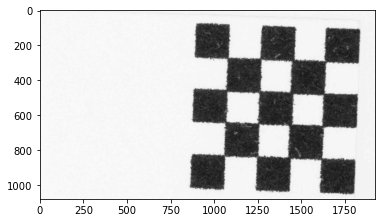

<class 'NoneType'> None


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\cornersubpix.cpp:58: error: (-215:Assertion failed) count >= 0 in function 'cv::cornerSubPix'


In [42]:

# 棋盘规格
BOARD_RAW = 4
BOARD_COL = 4
obj_p = np.zeros((BOARD_RAW*BOARD_COL, 3), np.float32)
obj_p[:, :2] = np.mgrid[0:BOARD_RAW, 0:BOARD_COL].T.reshape(-1, 2)
obj_points = []
img_points = []

name = images[1]
# name = 'test.png'
img = cv2.imread(name)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret,img = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# kernel = np.ones((20, 20),np.uint8)
# gray = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
show(gray)

# 寻找角点
ret, corners = cv2.findChessboardCorners(gray, (BOARD_RAW, BOARD_COL), cv2.CALIB_CB_ADAPTIVE_THRESH )
print(type(corners), corners)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
sub_corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

obj_points.append(obj_p)
img_points.append(sub_corners)

img = cv2.drawChessboardCorners(gray, (BOARD_RAW, BOARD_COL), sub_corners, ret)
cv2.imshow('img', img)
cv2.imwrite(IMG_RESULT_PATH + 'img'+name.split(os.sep)[-1], img)
cv2.waitKey(500)

In [19]:
print(corners)

None
